# Feature generation

## Feature generated

In this notebook we will try generate the following features based on the dataset : 

cumulated depth : somme des volumes disponibles jusqu’à un certain niveau
(p. ex. top 10) de chaque côté

imbalance of the book-order : (V_bid - V_ask)/(V_bid + V_ask)

Écart acheteur-vendeur (Spread) :
prix_ask_min – prix_bid_max

liquidity ratio : V_bid/V_ask

Statistical temporal features: Instantaneous volatility (variance over short windows), momentum (change in mid-price, trend indicators), and volume indicators (VWAP, average volume).

Other : book slope (slope of the volume-price curve), implied volatility indicators, etc.



Cannot be done with the current data :

Order Flow : somme entre volume total
d’ordres acheteurs et vendeurs exécutés (ou modifiés) sur une fenêtre

Order Flow Imbalance : différence entre volume total
d’ordres acheteurs et vendeurs exécutés (ou modifiés) sur une fenêtre

Multi-line order flow : Extension of OFI, measuring the net flow at the top N levels


In [1]:
import pandas as pd

In [2]:
coin = "ETH"
I = 2


df = pd.read_parquet(f'../data/preprocessed/DATA_{I}/{coin}_EUR.parquet')


df_cleaned = pd.DataFrame(index=df.index.get_level_values(0).unique())
features = pd.DataFrame(index=df.index.get_level_values(0).unique())

Keeping only one row data for each timestep

In [ ]:
df

level-10-bid-price  level-9-bid-price  \
timestamp    row_id                                            
1.748591e+09 0                    2310.04            2310.19   
             1                    2310.03            2310.04   
             3                    2310.03            2310.04   
             2                    2310.04            2310.19   
             4                    2310.04            2310.19   
...                                   ...                ...   
1.748836e+09 16862142             2197.91            2197.95   
             16862140             2197.95            2197.96   
             16862143             2197.91            2197.95   
             16862144             2197.91            2197.95   
             16862145             2197.87            2197.91   

                       level-8-bid-price  level-7-bid-price  \
timestamp    row_id                                           
1.748591e+09 0                   2310.20            2310.25   
             1                   2310.19            2310.20   
             3                   2310.19            2310.20   
             2                   2310.20            2310.25   
             4                   2310.20            2310.25   
...                                  ...                ...   
1.748836e+09 16862142            2197.96            2197.99   
             16862140            2197.99            2198.02   
             16862143            2197.96            2197.99   
             16862144            2197.96            2197.99   
             16862145            2197.95            2197.96   

                       level-6-bid-price  level-5-bid-price  \
timestamp    row_id                                           
1.748591e+09 0                   2310.28            2310.54   
             1                   2310.25            2310.28   
             3                   2310.25            2310.28   
             2                   2310.28            2310.54   
             4                   2310.28            2310.54   
...                                  ...                ...   
1.748836e+09 16862142            2198.02            2198.07   
             16862140            2198.07            2198.17   
             16862143            2198.02            2198.07   
             16862144            2198.02            2198.07   
             16862145            2197.99            2198.02   

                       level-4-bid-price  level-3-bid-price  \
timestamp    row_id                                           
1.748591e+09 0                   2310.57            2310.68   
             1                   2310.54            2310.57   
             3                   2310.54            2310.57   
             2                   2310.57            2310.68   
             4                   2310.57            2310.68   
...                                  ...                ...   
1.748836e+09 16862142            2198.17            2198.23   
             16862140            2198.22            2198.23   
             16862143            2198.17            2198.23   
             16862144            2198.17            2198.23   
             16862145            2198.07            2198.17   

                       level-2-bid-price  level-1-bid-price  ...  \
timestamp    row_id                                          ...   
1.748591e+09 0                   2310.85            2311.09  ...   
             1                   2310.68            2311.09  ...   
             3                   2310.68            2311.09  ...   
             2                   2310.79            2311.09  ...   
             4                   2310.84            2311.09  ...   
...                                  ...                ...  ...   
1.748836e+09 16862142            2198.49            2198.50  ...   
             16862140            2198.49            2198.50  ...   
             16862143            2198.49          

: 

In [ ]:
# Compute weighted average price "level-i-side-price" for each i and side by volume for each unique timestamp

# We'll compute the weighted average price for each side ('bid', 'ask') and each level (1 to 10)
# for each unique timestamp (ignoring row_id)

# For each level and side, compute the volume-weighted average price per timestamp and store in features

for side in ['bid', 'ask']:
    for i in range(1, 11):
        price_col = f'level-{i}-{side}-price'
        volume_col = f'level-{i}-{side}-volume'
        # Weighted average price per timestamp (ignoring row_id)
        weighted_avg = (
            df[price_col] * df[volume_col]
        ).groupby(level=0).sum() / df[volume_col].groupby(level=0).sum()
        # Assign weighted average price to df_cleaned DataFrame, indexed by unique timestamp
        df_cleaned.loc[weighted_avg.index, f'{price_col}'] = weighted_avg.values
        # Compute and assign average volume per timestamp
        avg_volume = df[volume_col].groupby(level=0).mean()
        df_cleaned.loc[avg_volume.index, f'{volume_col}'] = avg_volume.values

df_cleaned



In [ ]:

for col in df_cleaned.columns:
    if col not in features.columns:
        features[col] = df_cleaned[col]

features

,level-1-bid-price,level-1-bid-volume,level-2-bid-price,level-2-bid-volume,level-3-bid-price,level-3-bid-volume,level-4-bid-price,level-4-bid-volume,level-5-bid-price,level-5-bid-volume,...,level-6-ask-price,level-6-ask-volume,level-7-ask-price,level-7-ask-volume,level-8-ask-price,level-8-ask-volume,level-9-ask-price,level-9-ask-volume,level-10-ask-price,level-10-ask-volume
timestamp,,,,,,,,,,,,,,,,,,,,,
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,92475.9,0.824724,92478.8,4.768859,92487.3,2.384211,92489.1,0.008807,92489.8,2.384021
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,92475.9,0.824724,92478.8,4.768859,92487.3,2.384211,92489.1,0.008807,92489.8,2.384021
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,92475.9,0.824724,92478.8,4.768859,92487.3,2.384211,92489.1,0.008807,92489.8,2.384021
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,92475.9,0.824724,92478.8,4.768859,92487.3,2.384211,92489.1,0.008807,92489.8,2.384021
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,92475.7,2.384511,92475.9,0.824724,92478.8,4.768859,92487.3,2.384211,92489.1,0.008807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.748836e+09,92404.7,0.013865,92403.6,0.019478,92396.8,0.015374,92392.6,0.001000,92392.5,2.153367,...,92410.4,2.381837,92411.1,2.381817,92413.5,0.640213,92417.5,0.015125,92417.6,2.381651
1.748836e+09,92404.7,0.013865,92403.6,0.019478,92396.8,0.015374,92391.4,0.270000,92391.2,2.153398,...,92410.4,2.381837,92411.1,2.381817,92413.5,0.640213,92417.5,0.015125,92417.6,2.381651
1.748836e+09,92404.7,0.013865,92403.6,0.019478,92396.8,0.015374,92391.4,0.270000,92391.2,2.153398,...,92410.4,2.381837,92411.1,2.381817,92413.5,0.640213,92417.5,0.015125,92417.6,2.381651


## Generating bid-ask-imbalance or cumulative depth

Close to 1 → strong buying pressure.
Close to -1 → strong selling pressure.
Near 0 → balanced depth.


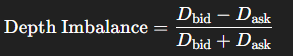


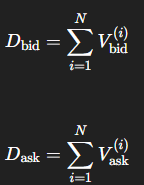

In [ ]:
N_level = 5

features[f"V-bid-{N_level}-levels"] = df_cleaned["level-1-bid-volume"]
features[f"V-ask-{N_level}-levels"] = df_cleaned["level-1-ask-volume"]

for i in range(2, N_level + 1):
    features[f"V-bid-{N_level}-levels"] += df_cleaned[f"level-{i}-bid-volume"]
    features[f"V-ask-{N_level}-levels"] += df_cleaned[f"level-{i}-ask-volume"]

features[f"bid-ask-imbalance-{N_level}-levels"] = (features[f"V-bid-{N_level}-levels"] - features[f"V-ask-{N_level}-levels"])/(features[f"V-bid-{N_level}-levels"] + features[f"V-ask-{N_level}-levels"])


## Generating spread

In [ ]:
features["spread"] = df_cleaned["level-1-ask-price"] - df_cleaned["level-1-bid-price"]

## Generating book slope

Used to estimate the steepness of liquidity
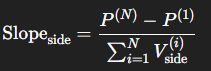

In [ ]:
N_level = 5

for side in ['bid', 'ask']:
    price_col = [f"level-{i}-{side}-price" for i in range(1, N_level + 1)]
    volume_col = [f"level-{i}-{side}-volume" for i in range(1, N_level + 1)]
    P_N = df_cleaned[price_col[-1]]
    P_1 = df_cleaned[price_col[0]]
    V_sum = sum([df_cleaned[col] for col in volume_col])
    features[f"slope-{side}-{N_level}-levels"] = (P_N - P_1) / V_sum


## Generating Volume-Weighted Average Price Depth (VWAP Depth)

This gives a weighted price level that reflects available liquidity
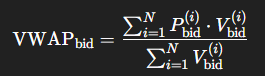

In [ ]:
# Calculate VWAP for bid and ask sides over N_level depth
N_level = 5

# Bid side VWAP
bid_price_cols = [f"level-{i}-bid-price" for i in range(1, N_level + 1)]
bid_volume_cols = [f"level-{i}-bid-volume" for i in range(1, N_level + 1)]
bid_prices = df_cleaned[bid_price_cols]
bid_volumes = df_cleaned[bid_volume_cols]
vwap_bid = (bid_prices * bid_volumes).sum(axis=1) / bid_volumes.sum(axis=1)
features[f"vwap-bid-{N_level}-levels"] = vwap_bid

# Ask side VWAP
ask_price_cols = [f"level-{i}-ask-price" for i in range(1, N_level + 1)]
ask_volume_cols = [f"level-{i}-ask-volume" for i in range(1, N_level + 1)]
ask_prices = df_cleaned[ask_price_cols]
ask_volumes = df_cleaned[ask_volume_cols]
vwap_ask = (ask_prices * ask_volumes).sum(axis=1) / ask_volumes.sum(axis=1)
features[f"vwap-ask-{N_level}-levels"] = vwap_ask

features[f"avg-vwap-diff-{N_level}-levels"] = features[f"vwap-bid-{N_level}-levels"] - features[f"vwap-ask-{N_level}-levels"]

## Generating Liquidity Ratio

liquidity ratio : V_bid/V_ask

In [ ]:
N_level = 5

features["liquidity-ratio"] = features[f"V-bid-{N_level}-levels"] / features[f"V-ask-{N_level}-levels"]

## Generating rates : Instantaneous volatility (variance over short windows), momentum (change in mid-price, trend indicators), and volume indicators (VWAP, average volume)

Note : average is done in terms over the number-of-transactions-window, and not over a time-window. This is done for comuting reasons.

In [ ]:
window = 20  # You can adjust the window size as needed

# Mid-price calculation using df_cleaned
mid_price = (df_cleaned["level-1-bid-price"] + df_cleaned["level-1-ask-price"]) / 2

# Instantaneous volatility (rolling variance of mid-price)
features["rate-inst-volatility"] = mid_price.rolling(window=window).var()

# Momentum (change in mid-price)
features["rate-momentum"] = mid_price.diff(periods=window)

# Trend indicator (rolling mean of mid-price)
features["rate-mid-price-trend"] = mid_price.rolling(window=window).mean()

# VWAP over all levels (already computed for N_level=5)
N_level = 5
features[f"rate-vwap-diff-{N_level}-levels"] = (features[f"vwap-bid-{N_level}-levels"] - features[f"vwap-ask-{N_level}-levels"]) / 2

# Average volume over short window (using level-1 volumes)
features["rate-bid-volume-level-1"] = df_cleaned["level-1-bid-volume"].rolling(window=window).mean()
features["rate-ask-volume-level-1"] = df_cleaned["level-1-ask-volume"].rolling(window=window).mean()


In [ ]:
# Calculate time difference between consecutive timestamps
#features["timestep_diff"] = features.index.to_series().diff()
#features["timestep_transformed"] = 

## Implementing some kind of return

In [ ]:
features["inst-return"] = features["rate-momentum"]/features["timesteps"].diff()

## Saving to csv

In [ ]:
features.to_parquet(f'../data/features/DATA_{I}/{coin}_EUR.parquet', index=True)

In [ ]:
features

,level-1-bid-price,level-1-bid-volume,level-2-bid-price,level-2-bid-volume,level-3-bid-price,level-3-bid-volume,level-4-bid-price,level-4-bid-volume,level-5-bid-price,level-5-bid-volume,...,vwap-bid-5-levels,vwap-ask-5-levels,avg-vwap-diff-5-levels,liquidity-ratio,rate-inst-volatility,rate-momentum,rate-mid-price-trend,rate-vwap-diff-5-levels,rate-bid-volume-level-1,rate-ask-volume-level-1
timestamp,,,,,,,,,,,,,,,,,,,,,
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,0.0,0.0,0.0,0.008182,NaN,NaN,NaN,0.0,NaN,NaN
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,0.0,0.0,0.0,0.008182,NaN,NaN,NaN,0.0,NaN,NaN
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,0.0,0.0,0.0,0.008182,NaN,NaN,NaN,0.0,NaN,NaN
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,0.0,0.0,0.0,0.008182,NaN,NaN,NaN,0.0,NaN,NaN
1.748591e+09,92472.1,0.007151,92456.0,0.001201,92455.7,0.049284,92455.6,0.001278,92450.0,0.054083,...,0.0,0.0,0.0,0.009642,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.748836e+09,92404.7,0.013865,92403.6,0.019478,92396.8,0.015374,92392.6,0.001000,92392.5,2.153367,...,0.0,0.0,0.0,0.244180,0.0,0.0,92404.75,0.0,0.014155,1.619149
1.748836e+09,92404.7,0.013865,92403.6,0.019478,92396.8,0.015374,92391.4,0.270000,92391.2,2.153398,...,0.0,0.0,0.0,0.273998,0.0,0.0,92404.75,0.0,0.014132,1.662032
1.748836e+09,92404.7,0.013865,92403.6,0.019478,92396.8,0.015374,92391.4,0.270000,92391.2,2.153398,...,0.0,0.0,0.0,0.273998,0.0,0.0,92404.75,0.0,0.014108,1.704914


In [ ]:
print(features.columns.tolist())

['level-1-bid-price', 'level-1-bid-volume', 'level-2-bid-price', 'level-2-bid-volume', 'level-3-bid-price', 'level-3-bid-volume', 'level-4-bid-price', 'level-4-bid-volume', 'level-5-bid-price', 'level-5-bid-volume', 'level-6-bid-price', 'level-6-bid-volume', 'level-7-bid-price', 'level-7-bid-volume', 'level-8-bid-price', 'level-8-bid-volume', 'level-9-bid-price', 'level-9-bid-volume', 'level-10-bid-price', 'level-10-bid-volume', 'level-1-ask-price', 'level-1-ask-volume', 'level-2-ask-price', 'level-2-ask-volume', 'level-3-ask-price', 'level-3-ask-volume', 'level-4-ask-price', 'level-4-ask-volume', 'level-5-ask-price', 'level-5-ask-volume', 'level-6-ask-price', 'level-6-ask-volume', 'level-7-ask-price', 'level-7-ask-volume', 'level-8-ask-price', 'level-8-ask-volume', 'level-9-ask-price', 'level-9-ask-volume', 'level-10-ask-price', 'level-10-ask-volume', 'V-bid-5-levels', 'V-ask-5-levels', 'bid-ask-imbalance-5-levels', 'spread', 'slope-bid-5-levels', 'slope-ask-5-levels', 'vwap-bid-5-lev